# Correlation Analysis

- https://blog.parsabg.com/stock-newseventssentiment-snes-1-0-a92c8748b2c3
- https://www.imf.org/en/Blogs/Articles/2022/01/11/crypto-prices-move-more-in-sync-with-stocks-posing-new-risks

## Bitcoin and S&P500

### 데이터수집 및 전처리

In [1]:
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import datetime
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020, 2, 10)
SP500 = web.DataReader(['sp500'], 'fred', start, end)
BTCUSD = pd.read_csv('../data/2012to2023BTC-USD_investing.csv')

In [2]:
print(SP500) # 형변환 후 인덱스를 DatetimeIndex로 변환해야 함
print(BTCUSD)

              sp500
DATE               
2013-05-13  1633.77
2013-05-14  1650.34
2013-05-15  1658.78
2013-05-16  1650.47
2013-05-17  1667.47
...             ...
2020-02-04  3297.59
2020-02-05  3334.69
2020-02-06  3345.78
2020-02-07  3327.71
2020-02-10  3352.09

[1761 rows x 1 columns]
              Date     Price      Open      High       Low    Vol. Change %
0     May 08, 2023  27,928.9  28,424.8  28,627.8  27,669.7  63.04K   -1.74%
1     May 07, 2023  28,424.8  28,857.1  29,122.0  28,419.6  36.50K   -1.50%
2     May 06, 2023  28,857.1  29,512.8  29,816.4  28,414.9  58.94K   -2.22%
3     May 05, 2023  29,513.2  28,842.2  29,653.9  28,825.3  74.52K    2.33%
4     May 04, 2023  28,842.1  29,023.6  29,352.7  28,687.4  53.80K   -0.63%
...            ...       ...       ...       ...       ...     ...      ...
4043  Apr 12, 2012       4.9       4.9       4.9       4.8  46.37K    0.00%
4044  Apr 11, 2012       4.9       4.8       5.0       4.8  67.04K    1.86%
4045  Apr 10, 2012       4.8   

In [3]:
BTCUSD['Price'] = BTCUSD['Price'].str.replace(',', '').astype(float)
BTCUSD['Date'] = pd.to_datetime(BTCUSD['Date'], format="%b %d, %Y")

In [4]:
print(BTCUSD.info())
print(BTCUSD)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      4048 non-null   datetime64[ns]
 1   Price     4048 non-null   float64       
 2   Open      4048 non-null   object        
 3   High      4048 non-null   object        
 4   Low       4048 non-null   object        
 5   Vol.      4048 non-null   object        
 6   Change %  4048 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 221.5+ KB
None
           Date    Price      Open      High       Low    Vol. Change %
0    2023-05-08  27928.9  28,424.8  28,627.8  27,669.7  63.04K   -1.74%
1    2023-05-07  28424.8  28,857.1  29,122.0  28,419.6  36.50K   -1.50%
2    2023-05-06  28857.1  29,512.8  29,816.4  28,414.9  58.94K   -2.22%
3    2023-05-05  29513.2  28,842.2  29,653.9  28,825.3  74.52K    2.33%
4    2023-05-04  28842.1  29,023.6  29,352

In [5]:
BTC = BTCUSD[['Date', 'Price']]
BTC.set_index('Date', inplace=True) # 인덱스 변경
BTC.columns = ['BTC']
BTC

,BTC
Date,
2023-05-08,27928.9
2023-05-07,28424.8
2023-05-06,28857.1
2023-05-05,29513.2
2023-05-04,28842.1
...,...
2012-04-12,4.9
2012-04-11,4.9
2012-04-10,4.8


In [6]:
SP500BTC = BTC.merge(SP500, how='inner',right_index = True, left_index=True)
#Drop NA since we have nan values for weekends. S&P500 only trades business days
SP500BTC.dropna(inplace=True)
print(SP500BTC)

               BTC    sp500
2020-02-10  9854.1  3352.09
2020-02-07  9818.6  3327.71
2020-02-06  9772.0  3345.78
2020-02-05  9611.8  3334.69
2020-02-04  9193.9  3297.59
...            ...      ...
2013-05-17   123.5  1667.47
2013-05-16   118.2  1650.47
2013-05-15   114.2  1658.78
2013-05-14   111.4  1650.34
2013-05-13   118.0  1633.77

[1699 rows x 2 columns]


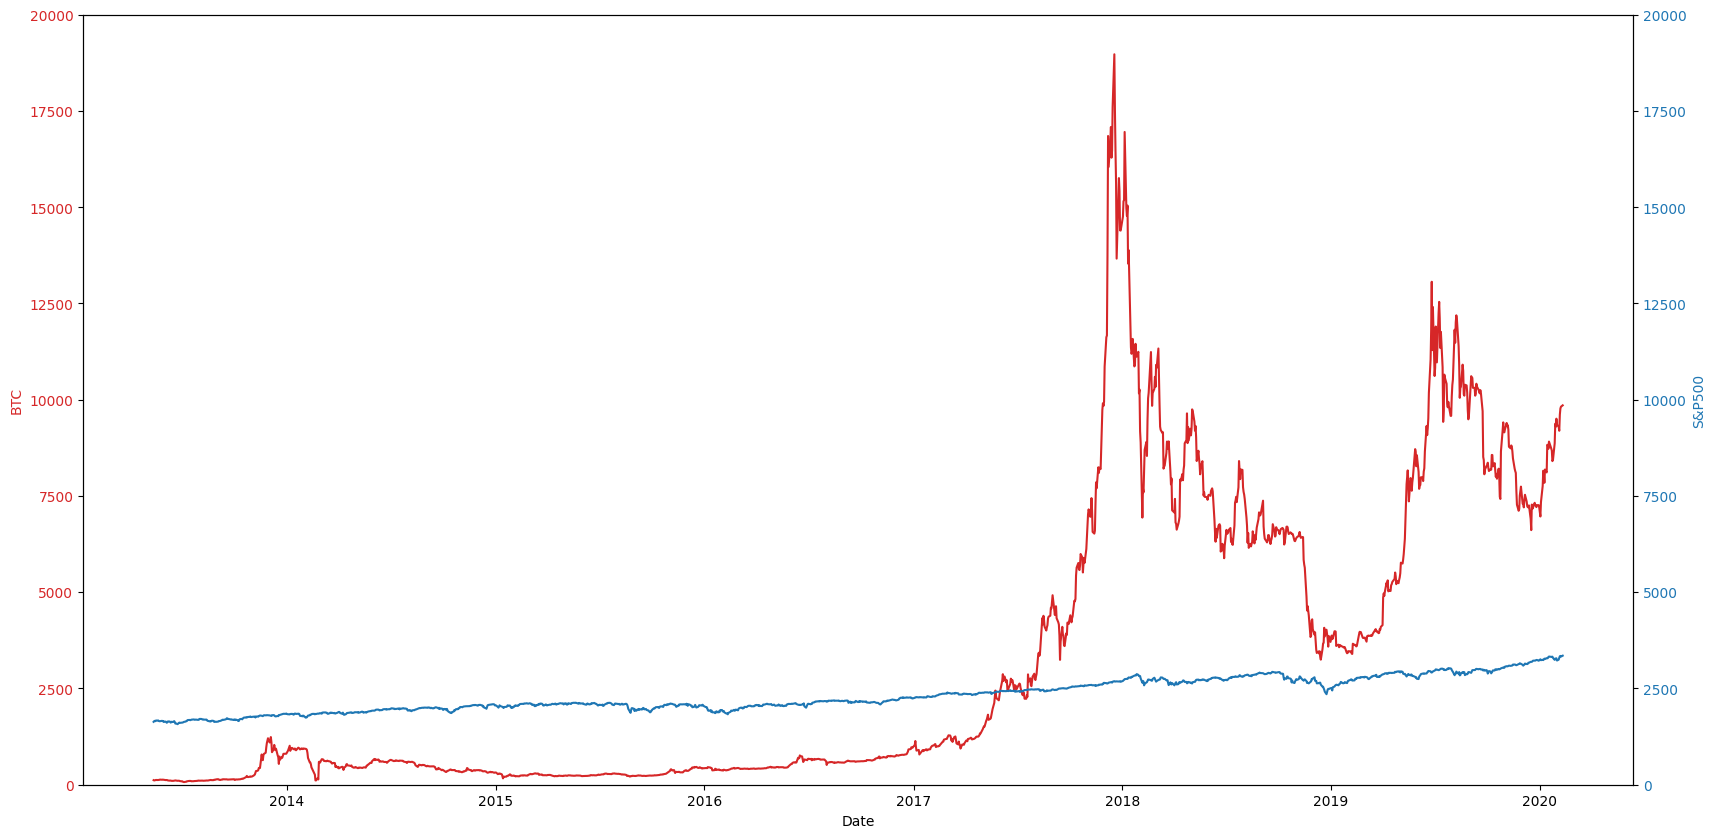

In [7]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(20, 10))

# 첫 번째 y 축 (왼쪽)
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('BTC', color=color)
ax1.plot(SP500BTC.index, SP500BTC['BTC'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([0, 20000])

# 두 번째 y 축 (오른쪽)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('S&P500', color=color)
ax2.plot(SP500BTC.index, SP500BTC['sp500'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0, 20000])

plt.show()

### 상관관계 확인

In [8]:
correlation = SP500BTC.corr()
print(correlation)

            BTC     sp500
BTC    1.000000  0.843242
sp500  0.843242  1.000000


padas에서 기본으로 제공하는 `dataframe.corr()`를 사용해 열의 상관관계를 찾을 수 있다. 이는 -1과 1사이의 값을 반환하는데, 1에 가까울수록 양의 상관관계를 가진다는 의미(0: 관계없음, -1: 음의 상관관계).

> `pandas`의 `corr()`는 일반적으로 pearson 상관계수를 사용하고, 별도의 상관계수를 적용하고 싶다면 `method='spearson'`과 같이 별도의 옵션을 설정해주면 된다.

위 결과로, BTC와 SP500은 약 0.84의 강한 양의 상관관계를 가지고 있는 것을 확인할 수 있다.

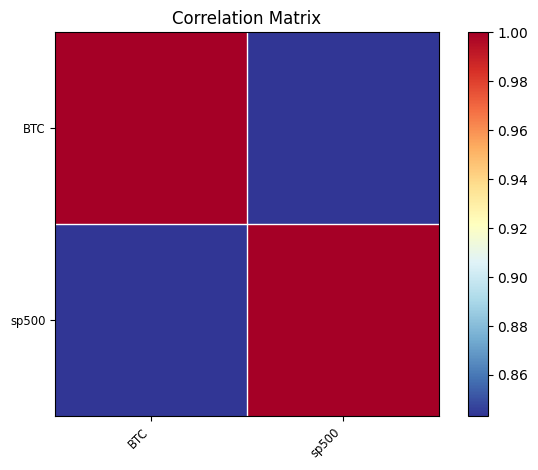

In [9]:
from statsmodels import api as sm
import matplotlib.pyplot as plt
sm.graphics.plot_corr(correlation,xnames=list(correlation.columns))
plt.show()

> 위 시각화에서 출력된 상관계수의 범위를 0(상관없음)부터 1(양의 상관관계)까지 확장해보면, BTC와 SP500이 얼마나 유의미한 상관관계를 가지는지 좀 더 직관적으로 알 수 있다.

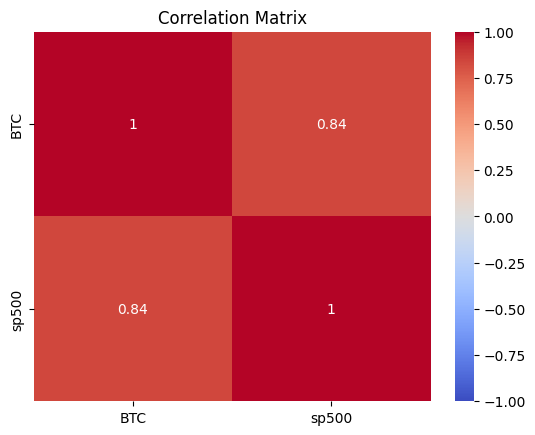

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 히트맵 그리기
sns.heatmap(correlation, cmap='coolwarm', annot=True, vmin=-1, vmax=1)

# 그래프 제목 설정
plt.title('Correlation Matrix')

# 그래프 출력
plt.show()

### 통계적으로 유의미한가?

linergress를 사용하면 slope, intercept, r-val, p-val 등을 확인할 수 있다.
아래 통계 검증 결과는 위 비트코인과 SP500이 유의미한 양의 상관관계를 가지고 있다는 결과를 확인할 수 있다.

In [11]:
from scipy.stats import linregress
linregress(SP500BTC['sp500'],SP500BTC['BTC'])

LinregressResult(slope=7.471207128552267, intercept=-14149.38300888473, rvalue=0.8432416999890365, pvalue=0.0, stderr=0.11561234135237107, intercept_stderr=272.4021097561934)

## Correlation Bitcoin and SNES(Stock-NewsEventsSentiment) and More

위 상관분석 과정을 응용하여, SNES 데이터에 적용해 SP500 조정종가, 이벤트, 루머 등과 같은 다양한 데이터에 대한 상관분석을 할 수 있습니다.

> _SNES 데이터는 `.parquet`으로 되어있다._
- https://www.kaggle.com/datasets/parsabg/stockNewseventssentiment-snes-10?resource=download&select=data.parquet
- 위 dataset의 `'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'`은 S&P500.

In [91]:
import pandas as pd
SNES_FILEPATH = '../data/data.parquet' # SNES 2020-09-30 ~ 2022-06-30
GOLD_FILEPATH = '../data/Gold_Daily.csv' # Gold 1994-12-06 ~ 2021-12-06
US10_FILEPATH = '../data/DGS10.csv' # US10YT(수익률) 1994-12-06 ~ 2021-12-06
snes_df = pd.read_parquet(SNES_FILEPATH)
gold_df = pd.read_csv(GOLD_FILEPATH)
us10_df = pd.read_csv(US10_FILEPATH)
display(snes_df, gold_df, us10_df)

,Open,High,Low,Close,Adj Close,Volume,Symbol,Security,GICS Sector,GICS Sub-Industry,...,News - Analyst Comments,News - Stocks,News - Dividends,News - Corporate Earnings,News - Mergers & Acquisitions,News - Store Openings,News - Product Recalls,News - Adverse Events,News - Personnel Changes,News - Stock Rumors
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-30,160.929993,163.100006,158.610001,160.179993,150.921692,3056900.0,MMM,3M,Industrials,Industrial Conglomerates,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-01,160.669998,161.899994,157.720001,158.789993,149.612045,1989100.0,MMM,3M,Industrials,Industrial Conglomerates,...,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-10-02,156.470001,161.940002,156.250000,160.360001,151.091309,1768600.0,MMM,3M,Industrials,Industrial Conglomerates,...,2.0,2.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0
2020-10-05,162.250000,163.500000,161.759995,162.750000,153.343170,1457000.0,MMM,3M,Industrials,Industrial Conglomerates,...,2.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0
2020-10-06,163.440002,165.699997,161.830002,162.229996,152.853195,2021900.0,MMM,3M,Industrials,Industrial Conglomerates,...,3.0,3.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-24,172.000000,174.679993,171.389999,174.610001,174.610001,3255000.0,ZTS,Zoetis,Health Care,Pharmaceuticals,...,7.0,7.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0
2022-06-27,173.839996,175.210007,172.929993,173.600006,173.600006,1378400.0,ZTS,Zoetis,Health Care,Pharmaceuticals,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-06-28,172.960007,174.669998,170.009995,170.119995,170.119995,1725800.0,ZTS,Zoetis,Health Care,Pharmaceuticals,...,7.0,7.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0


,Date,Price,Open,High,Low,Vol,Change %
0,"Dec 06, 1994",375.80,375.60,376.5,375.10,0.99K,0.0008
1,"Dec 07, 1994",376.10,377.00,377.5,375.10,1.88K,0.0008
2,"Dec 08, 1994",376.60,375.30,376.7,374.80,0.48K,0.0013
3,"Dec 09, 1994",377.00,375.60,377.0,375.50,0.38K,0.0011
4,"Dec 12, 1994",377.50,376.80,377.8,376.50,0.07K,0.0013
...,...,...,...,...,...,...,...
6881,"Dec 01, 2021",1784.30,1777.40,1795.7,1773.70,180.34K,0.0044
6882,"Dec 02, 2021",1762.70,1783.80,1785.2,1762.20,172.72K,-0.0121
6883,"Dec 03, 2021",1783.90,1769.40,1788.0,1766.00,-,0.0120
6884,"Dec 05, 2021",1783.80,1784.45,1789.1,1781.60,-,-0.0001


,DATE,DGS10
0,2018-05-09,3.00
1,2018-05-10,2.97
2,2018-05-11,2.97
3,2018-05-14,3.00
4,2018-05-15,3.08
...,...,...
1300,2023-05-03,3.38
1301,2023-05-04,3.37
1302,2023-05-05,3.44
1303,2023-05-08,3.52


In [92]:
snes_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Symbol',
       'Security', 'GICS Sector', 'GICS Sub-Industry',
       'News - All News Volume', 'News - Volume', 'News - Positive Sentiment',
       'News - Negative Sentiment', 'News - New Products', 'News - Layoffs',
       'News - Analyst Comments', 'News - Stocks', 'News - Dividends',
       'News - Corporate Earnings', 'News - Mergers & Acquisitions',
       'News - Store Openings', 'News - Product Recalls',
       'News - Adverse Events', 'News - Personnel Changes',
       'News - Stock Rumors'],
      dtype='object')

- `'News - All News Volume'`
- `'News - Volume'`
- `'News - Positive Sentiment'`
- `'News - Negative Sentiment'`
- `'News - New Products'`
- `'News - Layoffs'`
- `'News - Analyst Comments'`
- `'News - Stocks'`
- `'News - Dividends'`
- `'News - Corporate Earnings'`
- `'News - Mergers & Acquisitions'`
- `'News - Store Openings'`
- `'News - Product Recalls'`
- `'News - Adverse Events'`
- `'News - Personal Change'`
- `'News - Stock Rumors'`

### 데이터 정규화

In [108]:
us10 = us10_df[['DATE', 'DGS10']]
us10

,DATE,DGS10
0,2018-05-09,3.00
1,2018-05-10,2.97
2,2018-05-11,2.97
3,2018-05-14,3.00
4,2018-05-15,3.08
...,...,...
1300,2023-05-03,3.38
1301,2023-05-04,3.37
1302,2023-05-05,3.44
1303,2023-05-08,3.52


In [109]:
us10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    1305 non-null   object
 1   DGS10   1305 non-null   object
dtypes: object(2)
memory usage: 20.5+ KB


In [110]:
us10['DATE'] = pd.to_datetime(us10['DATE'])
us10['DGS10'] = pd.to_numeric(us10['DGS10'], errors='coerce').astype(float)

In [111]:
us10.set_index('DATE', inplace=True)
us10.columns = ['DGS10']
us10.index.name = 'Date' # 인덱스 이름 변경
print(us10)

            DGS10
Date             
2018-05-09   3.00
2018-05-10   2.97
2018-05-11   2.97
2018-05-14   3.00
2018-05-15   3.08
...           ...
2023-05-03   3.38
2023-05-04   3.37
2023-05-05   3.44
2023-05-08   3.52
2023-05-09   3.53

[1305 rows x 1 columns]


In [112]:
gold = gold_df[['Date', 'Price']]
gold.set_index('Date', inplace=True) # 인덱스 변경
gold.columns = ['Price']
print(gold)

              Price
Date               
1994-12-06   375.80
1994-12-07   376.10
1994-12-08   376.60
1994-12-09   377.00
1994-12-12   377.50
...             ...
2021-12-01  1784.30
2021-12-02  1762.70
2021-12-03  1783.90
2021-12-05  1783.80
2021-12-06  1778.65

[6886 rows x 1 columns]


In [113]:
stockAdjClose = snes_df[['Adj Close']] # SP500 조정 종가
print(stockAdjClose)
stockRumor = snes_df[['News - Stock Rumors']]
print(stockRumor)
stockNews = snes_df[['News - Stocks']]
print(stockNews)
adverseEvents = snes_df[['News - Adverse Events']]
print(adverseEvents)

             Adj Close
Date                  
2020-09-30  150.921692
2020-10-01  149.612045
2020-10-02  151.091309
2020-10-05  153.343170
2020-10-06  152.853195
...                ...
2022-06-24  174.610001
2022-06-27  173.600006
2022-06-28  170.119995
2022-06-29  173.919998
2022-06-30  171.889999

[217811 rows x 1 columns]
            News - Stock Rumors
Date                           
2020-09-30                  NaN
2020-10-01                  0.0
2020-10-02                  0.0
2020-10-05                  0.0
2020-10-06                  0.0
...                         ...
2022-06-24                  0.0
2022-06-27                  0.0
2022-06-28                  0.0
2022-06-29                  0.0
2022-06-30                  0.0

[217811 rows x 1 columns]
            News - Stocks
Date                     
2020-09-30            NaN
2020-10-01            4.0
2020-10-02            2.0
2020-10-05            2.0
2020-10-06            3.0
...                   ...
2022-06-24            7

### 데이터프레임 병합

In [114]:
GLDBTC = BTC.merge(gold, how='inner',right_index = True, left_index=True)
GLDBTC.dropna(inplace=True)
print(GLDBTC)

US10BTC = BTC.merge(us10, how='inner',right_index = True, left_index=True)
US10BTC.dropna(inplace=True)
print(US10BTC)

stockAdjClBTC = BTC.merge(stockAdjClose, how='inner',right_index = True, left_index=True)
#Drop NA since we have nan values for weekends. S&P500 only trades business days
stockAdjClBTC.dropna(inplace=True)
print(stockAdjClBTC)

stockRumorBTC = BTC.merge(stockRumor, how='inner',right_index = True, left_index=True)
stockRumorBTC.dropna(inplace=True)
print(stockRumorBTC)

stockNewsBTC = BTC.merge(stockNews, how='inner',right_index = True, left_index=True)
stockNewsBTC.dropna(inplace=True)
print(stockNewsBTC)

AdverseEvtBTC = BTC.merge(adverseEvents, how='inner',right_index = True, left_index=True)
AdverseEvtBTC.dropna(inplace=True)
print(AdverseEvtBTC)

                BTC    Price
Date                        
2021-12-06  50562.1  1778.65
2021-12-05  49405.5  1783.80
2021-12-03  53631.5  1783.90
2021-12-02  56496.0  1762.70
2021-12-01  57210.3  1784.30
...             ...      ...
2012-04-13      4.9  1659.10
2012-04-12      4.9  1679.50
2012-04-11      4.9  1659.00
2012-04-10      4.8  1659.50
2012-04-09      4.9  1642.50

[2538 rows x 2 columns]
                BTC  DGS10
Date                      
2023-05-08  27928.9   3.52
2023-05-05  29513.2   3.44
2023-05-04  28842.1   3.37
2023-05-03  29023.6   3.38
2023-05-02  28669.1   3.44
...             ...    ...
2018-05-15   8477.0   3.08
2018-05-14   8674.1   3.00
2018-05-11   8408.3   2.97
2018-05-10   9025.7   2.97
2018-05-09   9319.1   3.00

[1250 rows x 2 columns]
                BTC   Adj Close
Date                           
2020-09-30  10776.1  150.921692
2020-09-30  10776.1   51.231228
2020-09-30  10776.1  106.019371
2020-09-30  10776.1   80.923454
2020-09-30  10776.1  277.05999

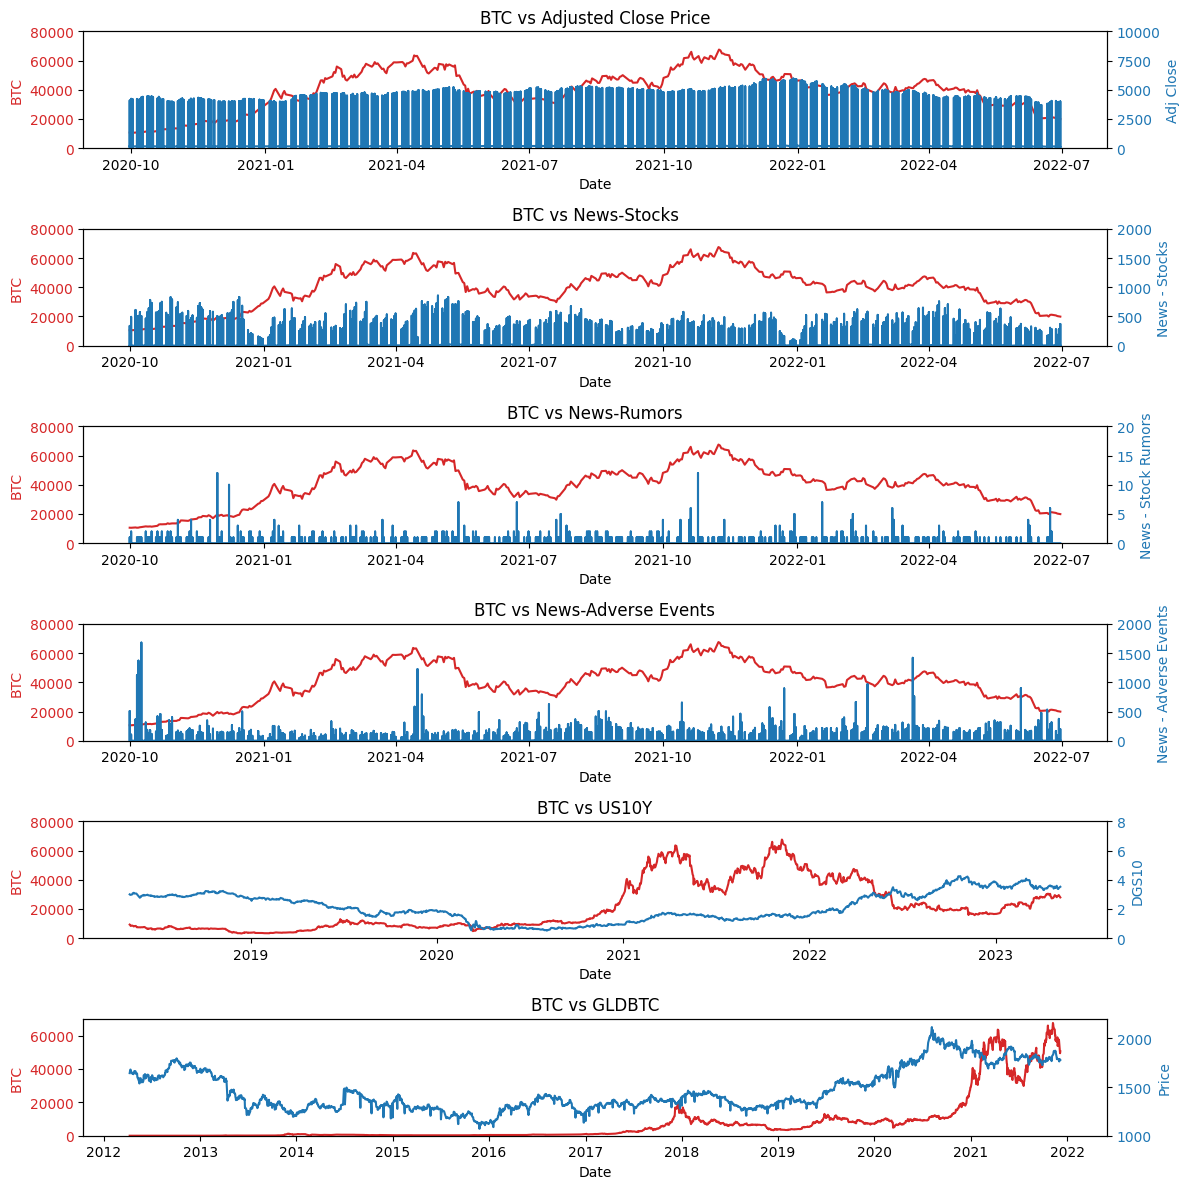

In [156]:
import matplotlib.pyplot as plt

# subplots 생성
fig, (ax1, ax2, ax3, ax4, ax5, ax6)  = plt.subplots(nrows=6, ncols=1, figsize=(12, 12))

ax1.set_title('BTC vs Adjusted Close Price')
ax2.set_title('BTC vs News-Stocks')
ax3.set_title('BTC vs News-Rumors')
ax4.set_title('BTC vs News-Adverse Events')
ax5.set_title('BTC vs US10Y')
ax6.set_title('BTC vs GLDBTC')

# --- Adj Close
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('BTC', color=color)
ax1.plot(stockAdjClBTC.index, stockAdjClBTC['BTC'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([0, 80000])

ax1_2 = ax1.twinx()
color = 'tab:blue'
ax1_2.set_ylabel('Adj Close', color=color)
ax1_2.plot(stockAdjClBTC.index, stockAdjClBTC['Adj Close'], color=color)
ax1_2.tick_params(axis='y', labelcolor=color)
ax1_2.set_ylim([0, 10000])

# --- Stocks
color = 'tab:red'
ax2.set_xlabel('Date')
ax2.set_ylabel('BTC', color=color)
ax2.plot(stockNewsBTC.index, stockNewsBTC['BTC'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0, 80000])

ax2_2 = ax2.twinx()
color = 'tab:blue'
ax2_2.set_ylabel('News - Stocks', color=color)
ax2_2.plot(stockNewsBTC.index, stockNewsBTC['News - Stocks'], color=color)
ax2_2.tick_params(axis='y', labelcolor=color)
ax2_2.set_ylim([0, 2000])

# --- Stock Rumors
color = 'tab:red'
ax3.set_xlabel('Date')
ax3.set_ylabel('BTC', color=color)
ax3.plot(stockRumorBTC.index, stockRumorBTC['BTC'], color=color)
ax3.tick_params(axis='y', labelcolor=color)
ax3.set_ylim([0, 80000])

ax3_2 = ax3.twinx()
color = 'tab:blue'
ax3_2.set_ylabel('News - Stock Rumors', color=color)
ax3_2.plot(stockRumorBTC.index, stockRumorBTC['News - Stock Rumors'], color=color)
ax3_2.tick_params(axis='y', labelcolor=color)
ax3_2.set_ylim([0, 20])

# --- Adverse Events
color = 'tab:red'
ax4.set_xlabel('Date')
ax4.set_ylabel('BTC', color=color)
ax4.plot(AdverseEvtBTC.index, AdverseEvtBTC['BTC'], color=color)
ax4.tick_params(axis='y', labelcolor=color)
ax4.set_ylim([0, 80000])

ax4_2 = ax4.twinx()
color = 'tab:blue'
ax4_2.set_ylabel('News - Adverse Events', color=color)
ax4_2.plot(AdverseEvtBTC.index, AdverseEvtBTC['News - Adverse Events'], color=color)
ax4_2.tick_params(axis='y', labelcolor=color)
ax4_2.set_ylim([0, 2000])

# --- US10Y
color = 'tab:red'
ax5.set_xlabel('Date')
ax5.set_ylabel('BTC', color=color)
ax5.plot(US10BTC.index, US10BTC['BTC'], color=color)
ax5.tick_params(axis='y', labelcolor=color)
ax5.set_ylim([0, 80000])

ax5_2 = ax5.twinx()
color = 'tab:blue'
ax5_2.set_ylabel('DGS10', color=color)
ax5_2.plot(US10BTC.index, US10BTC['DGS10'], color=color)
ax5_2.tick_params(axis='y', labelcolor=color)
ax5_2.set_ylim([0, 8])

# --- Gold
color = 'tab:red'
ax6.set_xlabel('Date')
ax6.set_ylabel('BTC', color=color)
ax6.plot(GLDBTC.index, GLDBTC['BTC'], color=color)
ax6.tick_params(axis='y', labelcolor=color)
ax6.set_ylim([0, 70000])

ax6_2 = ax6.twinx()
color = 'tab:blue'
ax6_2.set_ylabel('Price', color=color)
ax6_2.plot(GLDBTC.index, GLDBTC['Price'], color=color)
ax6_2.tick_params(axis='y', labelcolor=color)
ax6_2.set_ylim([1000, 2200])

plt.tight_layout()
plt.show()

In [164]:
corr_AdjBTC = stockAdjClBTC.corr()
corr_stockNewsBTC = stockNewsBTC.corr()
corr_stockRumorBTC = stockRumorBTC.corr()
corr_AdverseEvtBTC = AdverseEvtBTC.corr()
corr_US10BTC = US10BTC.corr()
corr_GLDBTC = GLDBTC.corr()

print(corr_AdjBTC,'\n')
print(corr_stockNewsBTC,'\n')
print(corr_stockRumorBTC,'\n')
print(corr_AdverseEvtBTC,'\n')
print(corr_US10BTC,'\n')
print(corr_GLDBTC)

                BTC  Adj Close
BTC        1.000000   0.039951
Adj Close  0.039951   1.000000 

                    BTC  News - Stocks
BTC            1.000000      -0.009603
News - Stocks -0.009603       1.000000 

                          BTC  News - Stock Rumors
BTC                  1.000000            -0.000724
News - Stock Rumors -0.000724             1.000000 

                            BTC  News - Adverse Events
BTC                    1.000000              -0.015812
News - Adverse Events -0.015812               1.000000 

            BTC     DGS10
BTC    1.000000 -0.147521
DGS10 -0.147521  1.000000 

            BTC     Price
BTC    1.000000  0.606757
Price  0.606757  1.000000


## Correlation Matrix

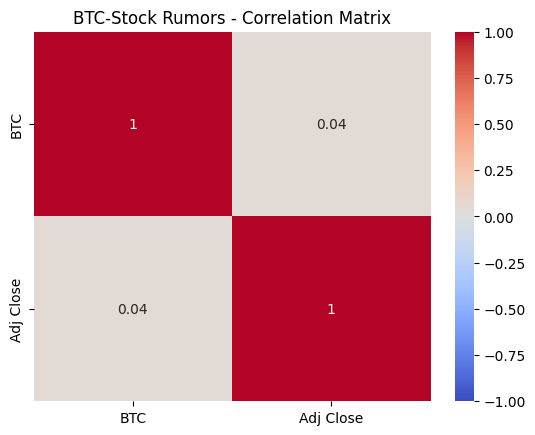

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

# 히트맵 그리기
sns.heatmap(corr_AdjBTC, cmap='coolwarm', annot=True, vmin=-1, vmax=1)

# 그래프 제목 설정
plt.title('BTC-Stock Rumors - Correlation Matrix')

# 그래프 출력
plt.show()

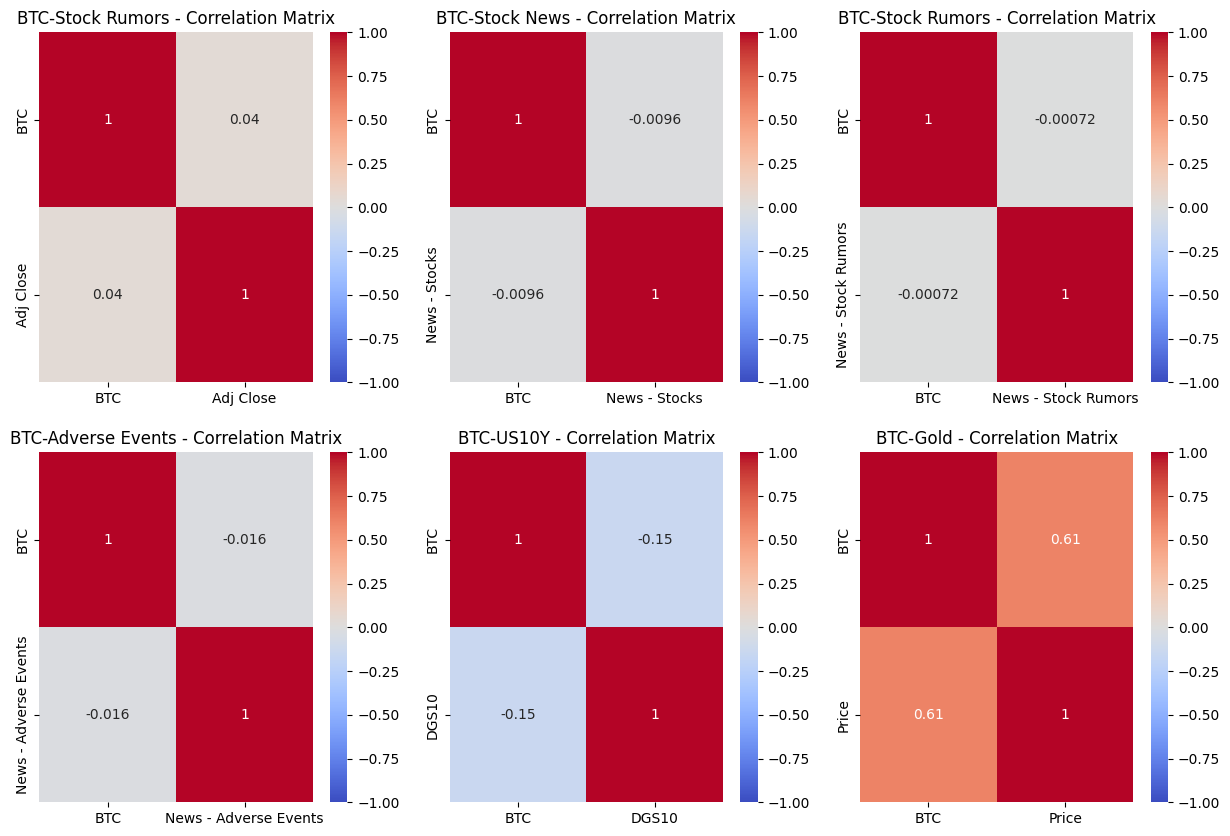

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 사이즈 설정
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# 각각의 히트맵 그리기
sns.heatmap(corr_AdjBTC, cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=axs[0, 0])
axs[0, 0].set_title('BTC-Stock Rumors - Correlation Matrix')
sns.heatmap(corr_stockNewsBTC, cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=axs[0, 1])
axs[0, 1].set_title('BTC-Stock News - Correlation Matrix')
sns.heatmap(corr_stockRumorBTC, cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=axs[0, 2])
axs[0, 2].set_title('BTC-Stock Rumors - Correlation Matrix')
sns.heatmap(corr_AdverseEvtBTC, cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=axs[1, 0])
axs[1, 0].set_title('BTC-Adverse Events - Correlation Matrix')
sns.heatmap(corr_US10BTC, cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=axs[1, 1])
axs[1, 1].set_title('BTC-US10Y - Correlation Matrix')
sns.heatmap(corr_GLDBTC, cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=axs[1, 2])
axs[1, 2].set_title('BTC-Gold - Correlation Matrix')

# 그래프 출력
plt.show()

### 선형회귀분석

아래는 pearson 상관계수를 적용한 pandas의 `corr()`의 결과로 선형회귀분석 결과입니다.
`stderr, intercept_stderr`값이 모두 0.0으로 나오는 것으로 미루어보아 정확하게 데이터를 설명하고 있음을 알 수 있습니다.

#### BTC - 조정종가

In [171]:
from scipy.stats import linregress
linregress(corr_AdjBTC['Adj Close'],corr_AdjBTC['BTC'])

LinregressResult(slope=-1.0, intercept=1.0399508844459173, rvalue=-1.0, pvalue=0.0, stderr=0.0, intercept_stderr=0.0)

#### BTC - Stocks News

In [172]:
linregress(corr_stockNewsBTC['News - Stocks'],corr_stockNewsBTC['BTC'])

LinregressResult(slope=-1.0, intercept=0.9903967186383893, rvalue=-1.0, pvalue=0.0, stderr=0.0, intercept_stderr=0.0)

#### BTC - Stock Rumor

In [173]:
linregress(corr_stockRumorBTC['News - Stock Rumors'],corr_stockRumorBTC['BTC'])

LinregressResult(slope=-1.0, intercept=0.999275976788554, rvalue=-1.0, pvalue=0.0, stderr=0.0, intercept_stderr=0.0)

#### BTC - 부정이벤트

In [174]:
linregress(corr_AdverseEvtBTC['News - Adverse Events'],corr_AdverseEvtBTC['BTC'])

LinregressResult(slope=-1.0, intercept=0.9841876943200644, rvalue=-1.0, pvalue=0.0, stderr=0.0, intercept_stderr=0.0)

#### BTC - 미 국채 10년물 수익률

In [175]:
linregress(corr_US10BTC['DGS10'],corr_US10BTC['BTC'])

LinregressResult(slope=-1.0, intercept=0.8524789749933165, rvalue=-1.0, pvalue=0.0, stderr=0.0, intercept_stderr=0.0)

#### BTC - Gold

In [176]:
linregress(corr_GLDBTC['Price'],corr_GLDBTC['BTC'])

LinregressResult(slope=-1.0, intercept=1.606757007107354, rvalue=-1.0, pvalue=0.0, stderr=0.0, intercept_stderr=0.0)